In [2]:
#ANSWERING QUESTION 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [6]:
#For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [17]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# The tech stocks we'll use for analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the stock data and store them in a list of DataFrames
stock_data = []
for stock, name in zip(tech_list, company_name):
    data = yf.download(stock, start=start, end=end)
    data['company_name'] = name
    stock_data.append(data)

# Concatenate all the DataFrames
df = pd.concat(stock_data, axis=0)

# Display the top 10 rows
print(df.head(10))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-06-26  186.830002  188.050003  185.229996  185.270004  184.291275   
2023-06-27  185.889999  188.389999  185.669998  188.059998  187.066544   
2023-06-28  187.929993  189.899994  187.600006  189.250000  188.250244   
2023-06-29  189.080002  190.070007  188.940002  189.589996  188.588440   
2023-06-30  191.630005  194.479996  191.259995  193.970001  192.945312   
2023-07-03  193.779999  193.880005  191.759995  192.460007  191.443298   
2023-07-05  191.570007  192.979996  190.619995  191.330002  190.319260   
2023-07-06  189.839996  192.020004  189.199997  191.809998  190.796722   
2023-07-07  191.410004  192.669998  190.240005  190.679993  189.672699   
2023-07-10  189.259995  189.990005  187.039993  188.610001  187.613632   

              Volume company_name  
Date                               
2023-06-26  48088700        APPLE  
202

In [18]:
#Summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,183.895454,185.482609,182.459802,183.981107,183.494365,6.018261e+07
std,10.438760,10.583537,10.346584,10.453787,10.474549,2.475733e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.677800e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.343900e+07
75%,191.089996,192.250000,189.880005,191.289993,190.807404,6.606290e+07
max,217.589996,220.199997,213.000000,216.669998,216.669998,2.464214e+08


In [19]:
#General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-06-26 to 2024-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


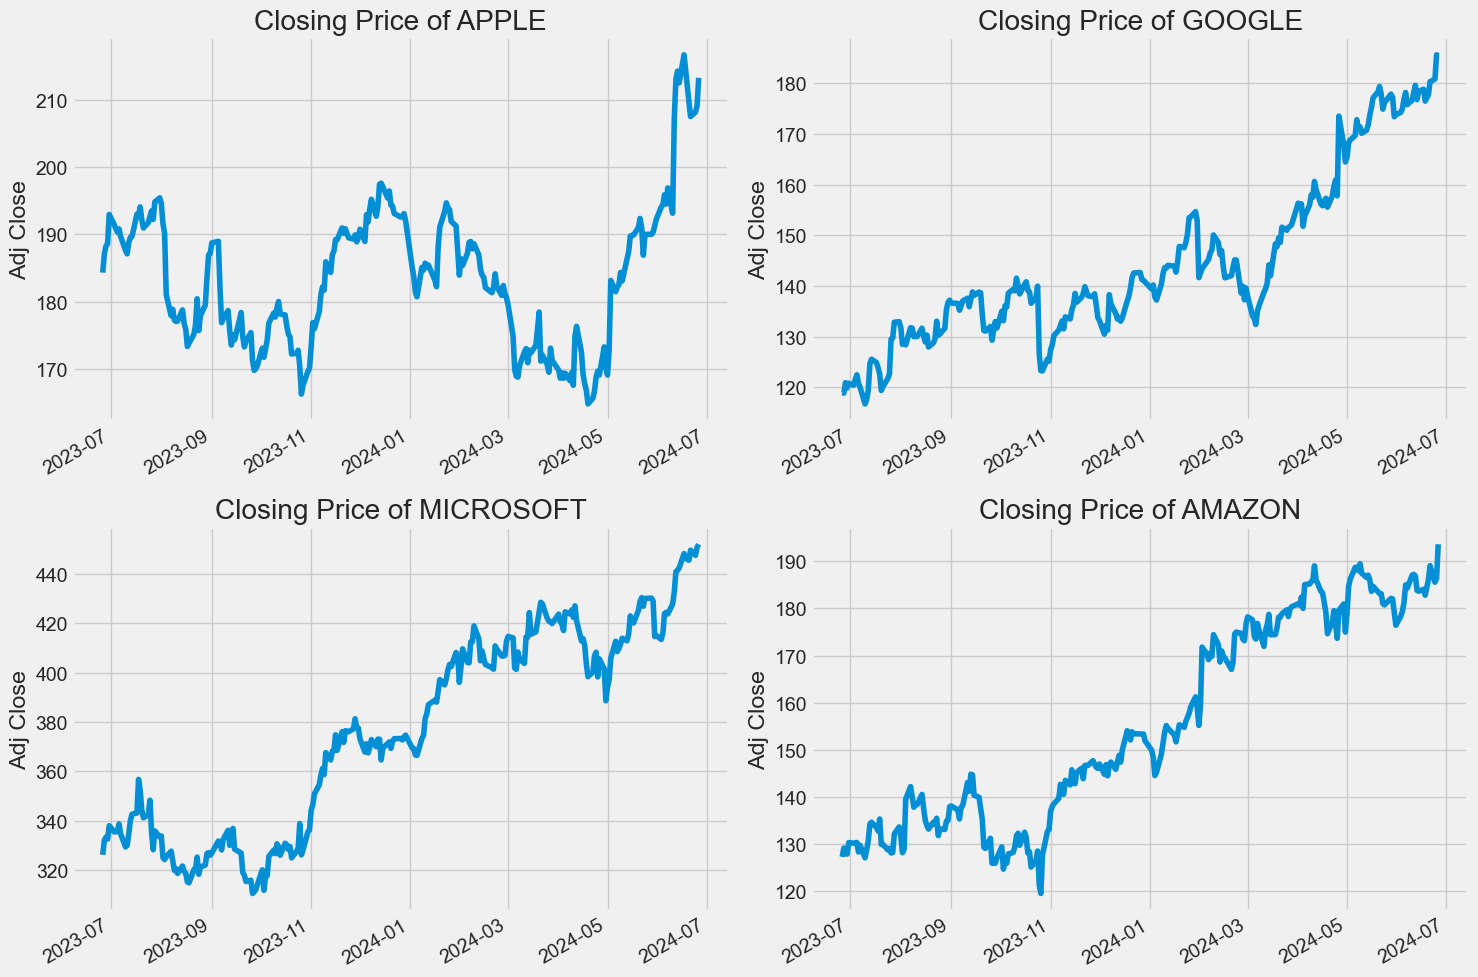

In [21]:
# Plot historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock_df, name) in enumerate(zip(stock_data, company_name), 1):
    plt.subplot(2, 2, i)
    stock_df['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name}")

plt.tight_layout()
plt.show()


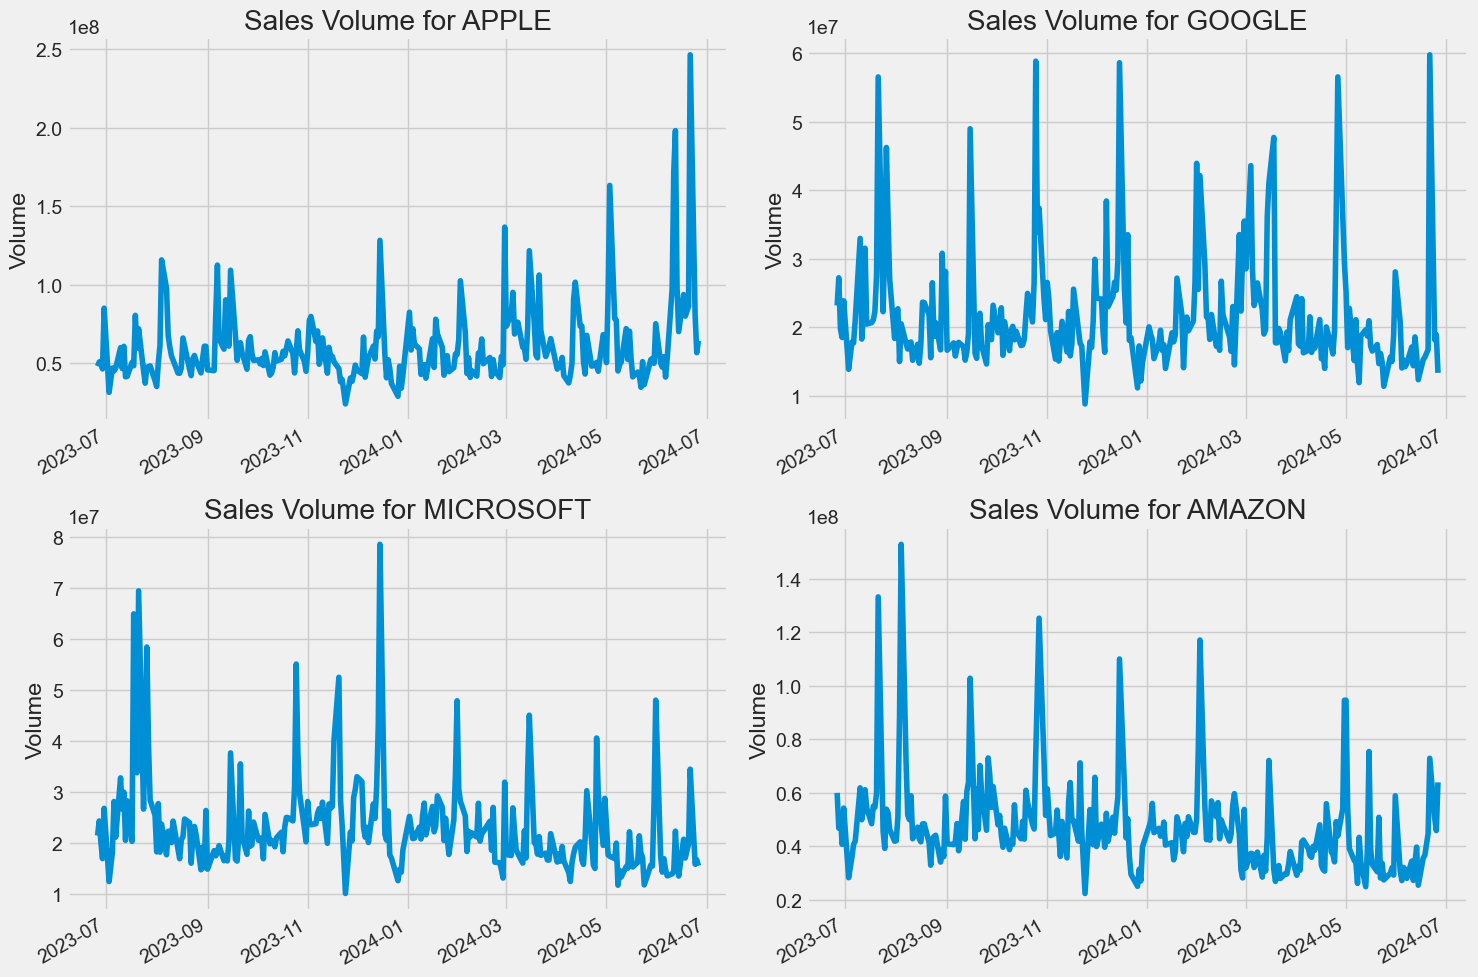

In [25]:
#plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, (stock_df, name) in enumerate(zip(stock_data, company_name), 1):
    plt.subplot(2, 2, i)
    stock_df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name}")

plt.tight_layout()

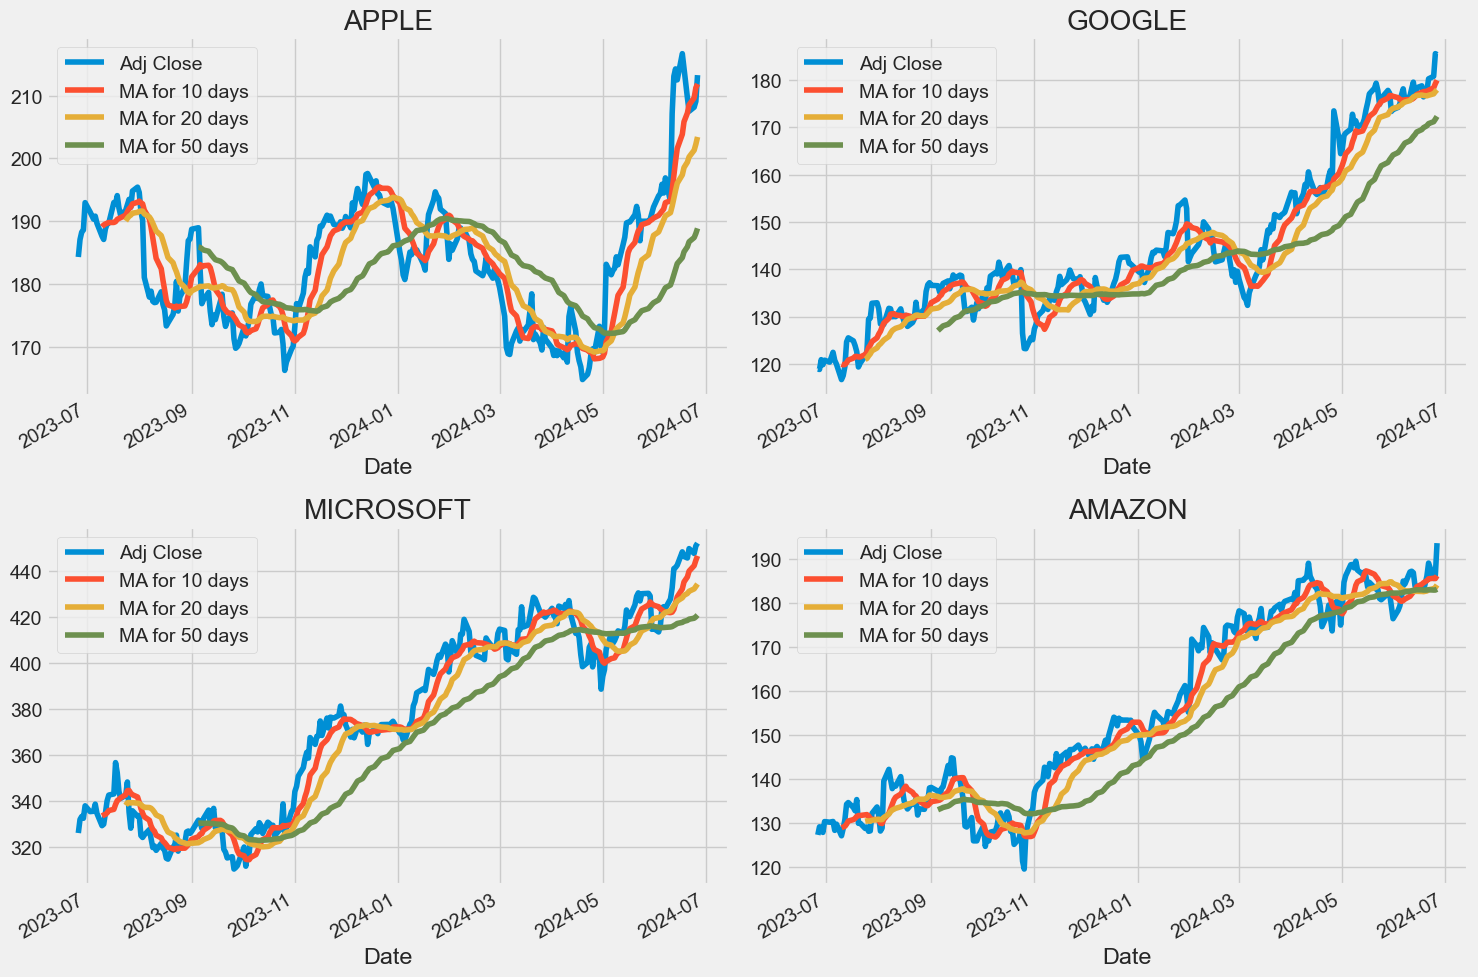

In [28]:
#2. ANSWERING QUESTION 2
#moving averages
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    for stock_df in stock_data:
        column_name = f"MA for {ma} days"
        stock_df[column_name] = stock_df['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot for each company
stock_data_dict = {name: df for name, df in zip(company_name, stock_data)}

stock_data_dict['APPLE'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

stock_data_dict['GOOGLE'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

stock_data_dict['MICROSOFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

stock_data_dict['AMAZON'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


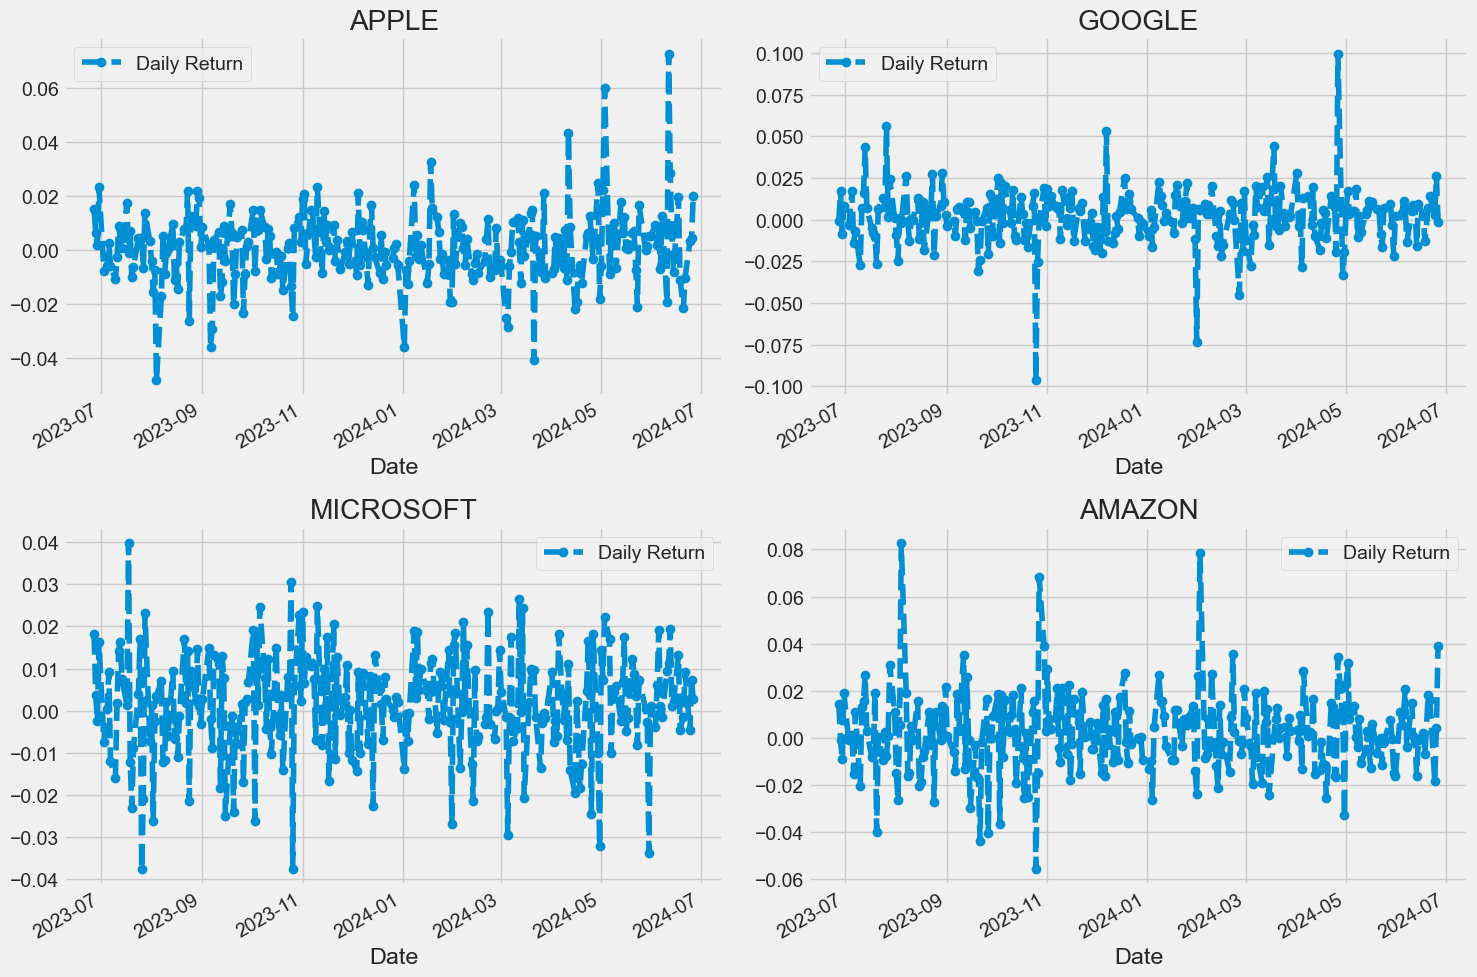

In [35]:
#3. ANSWERING QUESTION 3
# Calculate the daily return percentage
for stock_df in stock_data:
    stock_df['Daily Return'] = stock_df['Adj Close'].pct_change()

# Plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Use a dictionary to map company names to DataFrames
stock_data_dict = {name: df for name, df in zip(company_name, stock_data)}

stock_data_dict['APPLE']['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

stock_data_dict['GOOGLE']['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

stock_data_dict['MICROSOFT']['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

stock_data_dict['AMAZON']['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


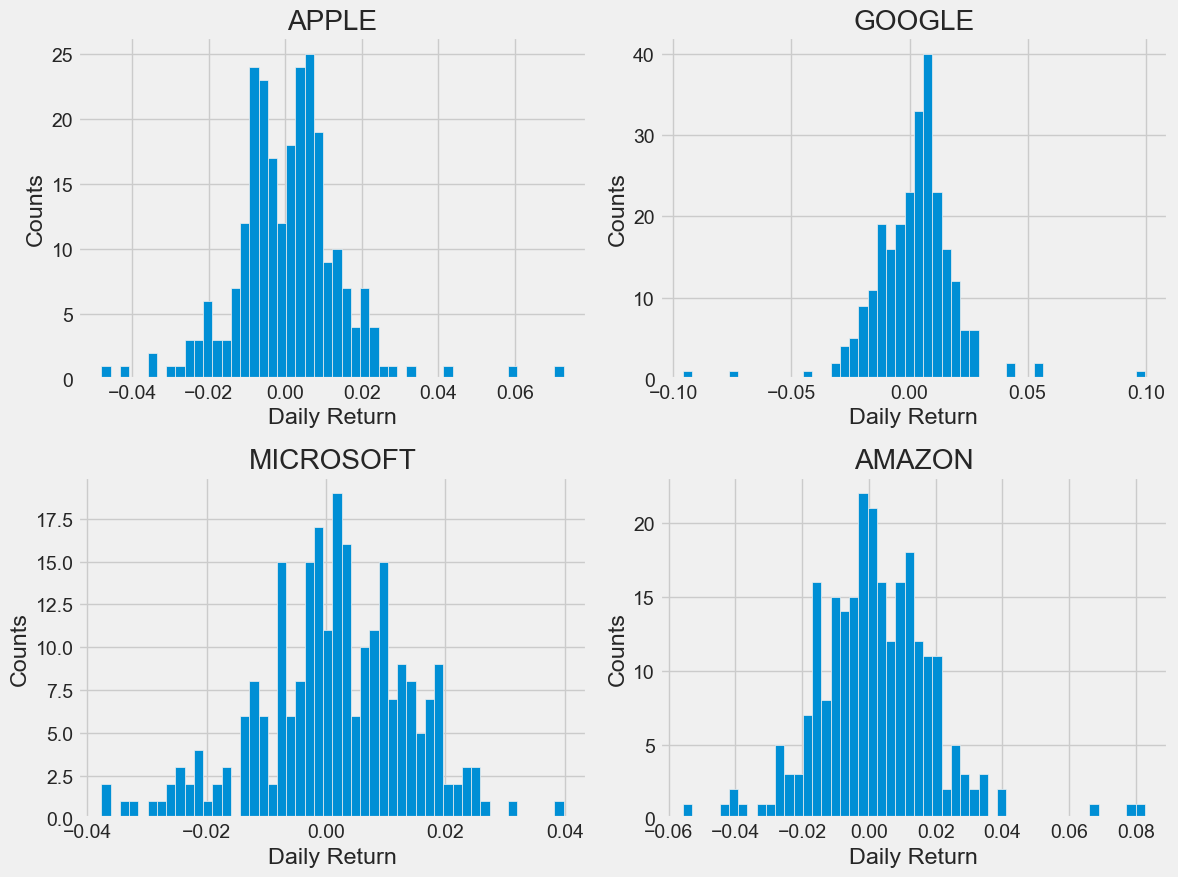

In [36]:
#Overall look at average daily return using a histogram
plt.figure(figsize=(12, 9))

for i, (stock_df, name) in enumerate(zip(stock_data, company_name), 1):
    plt.subplot(2, 2, i)
    stock_df['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(name)

plt.tight_layout()

In [ ]:
#4. ANSWERING QUESTION 4
